<h1>Minha X Rede Neural Convolucional para Aprendizado de Máquina</h1>
<h2>*** Classificador de quadrados, círculos, losangolos e triângulos em imagens ***</h2>
<br>
<h3>Augusto Felipe Maggioni</h3>

In [13]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import numpy as np
from keras.layers import Conv2D, Conv3D
from keras.layers import Reshape
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import requests, lxml, re, json, urllib.request
from bs4 import BeautifulSoup
import os, uuid
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.114 Safari/537.36"
}


def download_image(url_image, path_save):
  response = requests.get(url_image)
  if response.status_code == 200:
      with open(f'{os.path.join(PATH_IMAGES, str(uuid.uuid4()))}.jpg', 'wb') as file_img:
          file_img.write(response.content)
          print("ok")


for step in [('train', 100), ('test', 30), ('valid', 15)]:
  for name_image in ['circle', 'trapezoid', 'squares', 'triangles']:
    qnt = 0
    PATH_IMAGES = f'/content/gdrive/My Drive/Machine Learning/CNN3/{name_image}/{step[0]}'
    if not os.path.exists(PATH_IMAGES):
      os.makedirs(PATH_IMAGES)
    idx_page_search = 0
    while True:
      if qnt >= step[1]:break
      params = {
        "q": f"{name_image} format png",
        # "tbm": "isch",
        # "hl": "en",
        # "gl": "us",
        "ijn": idx_page_search,
        "sclient": "img"
      }

      res = requests.get("https://www.google.com/search", params=params, headers=headers)
      soup = BeautifulSoup(res.text, "lxml")

      for img in soup.select('img'):
        try:
          print(img['data-src'])
          if 'type=FAVICON' in img['data-src']:continue
          download_image(img['data-src'], PATH_IMAGES)
          qnt +=1
          if qnt >= step[1]:break
        except:continue
      idx_page_search += 1

In [26]:
import cv2
train_images, test_images = [], []
train_labels, test_labels = [], []
valid_images, valid_labels = [], []
for idx, name_image in enumerate(['circle', 'trapezoid', 'squares', 'triangles']):
  for img_path in os.listdir(f'/content/gdrive/My Drive/Machine Learning/CNN2/{name_image}/train'):
    img = cv2.imread(os.path.join(f'/content/gdrive/My Drive/Machine Learning/CNN2/{name_image}/train', img_path))
    img = (img / 255.0).astype('float32')
    img = cv2.resize(img, (128, 128))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_labels.append(idx)
    train_images.append(img)

  for img_path in os.listdir(f'/content/gdrive/My Drive/Machine Learning/CNN2/{name_image}/test'):
    img = cv2.imread(os.path.join(f'/content/gdrive/My Drive/Machine Learning/CNN2/{name_image}/test', img_path))
    img = (img / 255.0).astype('float32')
    img = cv2.resize(img, (128, 128))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_labels.append(idx)
    test_images.append(img)

  for img_path in os.listdir(f'/content/gdrive/My Drive/Machine Learning/CNN2/{name_image}/valid'):
    img = cv2.imread(os.path.join(f'/content/gdrive/My Drive/Machine Learning/CNN2/{name_image}/valid', img_path))
    img = (img / 255.0).astype('float32')
    img = cv2.resize(img, (128, 128))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    valid_labels.append(idx)
    valid_images.append(img)

In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 65536)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

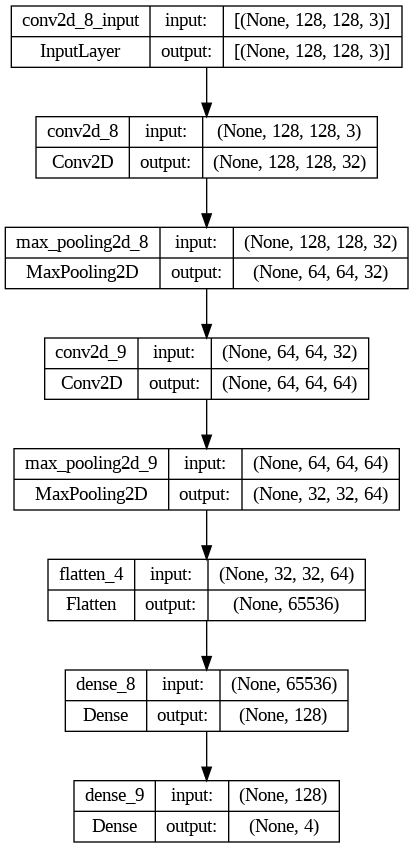

In [29]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [30]:
train_images_np = np.array(train_images)
train_labels_np = np.array(train_labels)
test_images_np = np.array(test_images)
test_labels_np = np.array(test_labels)
valid_images_np = np.array(valid_images)
valid_labels_np = np.array(valid_labels)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [55]:
history  = model.fit(train_images_np, train_labels_np, epochs=10, batch_size=8, validation_data=(test_images_np, test_labels_np),
            callbacks=[early_stopping, model_checkpoint],)

Epoch 1/10
50/50 [==============================] - 1s 22ms/step - loss: 0.1677 - accuracy: 0.9700 - val_loss: 0.1361 - val_accuracy: 0.9333
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 0.5115 - accuracy: 0.8325 - val_loss: 0.4981 - val_accuracy: 0.7833
Epoch 3/10
50/50 [==============================] - 1s 14ms/step - loss: 0.3294 - accuracy: 0.8925 - val_loss: 0.1430 - val_accuracy: 0.9750
Epoch 4/10
50/50 [==============================] - 1s 12ms/step - loss: 0.2067 - accuracy: 0.9600 - val_loss: 0.3232 - val_accuracy: 0.9250
Epoch 5/10
50/50 [==============================] - 1s 12ms/step - loss: 0.1316 - accuracy: 0.9625 - val_loss: 0.0980 - val_accuracy: 0.9667
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0867 - accuracy: 0.9750 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 7/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0496 - accuracy: 0.9825 - val_loss: 0.0995 - val_accuracy: 0.9833
Epoch 8/10
50/5

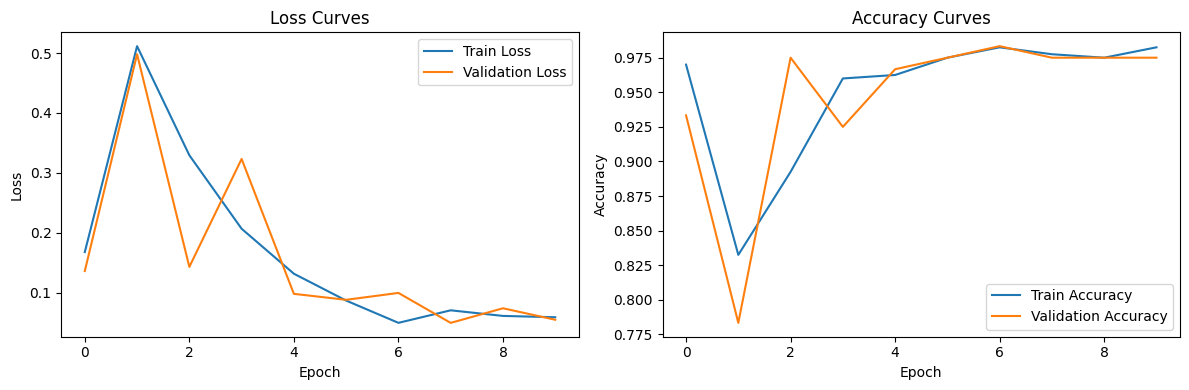

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Análise da curva loss**

 - Fica perceptível que ao longo das épocas o a validação loss possui banstante variação, mas que ao final do treinamento a rede chega a se estabilizar e ocorrer com menor. Não distante, no próprio treinamento, no início, há uma instabilidade, chegando a aumentar a perda (em azul). Isso significa que no início do treinamento a rede estava com bastante instabilidade, não conseguindo chegar a um padrão. Por outro lado, a partir da época 5, ocorre, tanto no trainamento quando na validação uma convergência maior, apesar dos valores de perdas serem pequeno.

**Análise da curva de acurácia**
 - Assim como na curva de loss, mas de maneira inversa, observa-se que a rede, ao início, possui uma acuária alta e em seguida uma quedra brusca. Entretanto, nas próximas épocas a rede se estabiliza e acaba chegando nos maiores valores que o modelo conseguiu chegar. A partir da época 5, a rede se estabiliza tanto nos dados de treinamento quando no de validação


 Em resumo, apesar da instabilidade inicial, ao final o modelo consegue aprender e distinguir as 4 classes com eficiência de 96%. Aumentar e/ou diminuir o número de épocas e batch, ao final, a métrica de acurácia sofre pequena variação ao ponto de não ser significativa para a classificação final.

In [57]:
test_loss, test_accuracy = model.evaluate(valid_images_np, valid_labels_np)
print(f'Acurácia no conjunto de teste: {test_accuracy}')

2/2 [==============================] - 0s 11ms/step - loss: 0.1893 - accuracy: 0.9667
Acurácia no conjunto de teste: 0.9666666388511658


In [58]:
predict = model.predict(valid_images_np)
classes = np.argmax(predict, axis=1)

2/2 [==============================] - 0s 7ms/step


In [59]:
for ic, classe_predita in enumerate(classes):
  print(f'Classe real: {valid_labels_np[ic]}. Classe predita {classe_predita}')
  if classe_predita == valid_labels_np[ic]:
    print("acertou")
  else:
    print("errou")

Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 0. Classe predita 0
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 0
errou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Classe predita 1
acertou
Classe real: 1. Cl

In [60]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns

In [61]:
accuracy = accuracy_score(valid_labels_np, classes)
print("Acurácia:", accuracy)

precision = precision_score(valid_labels_np, classes, average=None)
recall = recall_score(valid_labels_np, classes, average=None)
f1 = f1_score(valid_labels_np, classes, average=None)

precision_macro = precision_score(valid_labels_np, classes, average='macro')
recall_macro = recall_score(valid_labels_np, classes, average='macro')
f1_macro = f1_score(valid_labels_np, classes, average='macro')

n_classes = 4
y_true_bin = label_binarize(valid_labels_np, classes=range(n_classes))
y_pred_bin = label_binarize(classes, classes=range(n_classes))

roc_auc = roc_auc_score(valid_labels_np, y_pred_bin, average='macro', multi_class='ovo')

print("Precisão por classe:", precision)
print("Recall por classe:", recall)
print("F1-Score por classe:", f1)
print("Precisão Média (macro):", precision_macro)
print("Recall Médio (macro):", recall_macro)
print("F1-Score Médio (macro):", f1_macro)
print("ROC AUC Score (macro):", roc_auc)

Acurácia: 0.9666666666666667
Precisão por classe: [0.9375 1.     0.9375 1.    ]
Recall por classe: [1.         0.93333333 1.         0.93333333]
F1-Score por classe: [0.96774194 0.96551724 0.96774194 0.96551724]
Precisão Média (macro): 0.96875
Recall Médio (macro): 0.9666666666666668
F1-Score Médio (macro): 0.9666295884315907
ROC AUC Score (macro): 0.9777777777777779


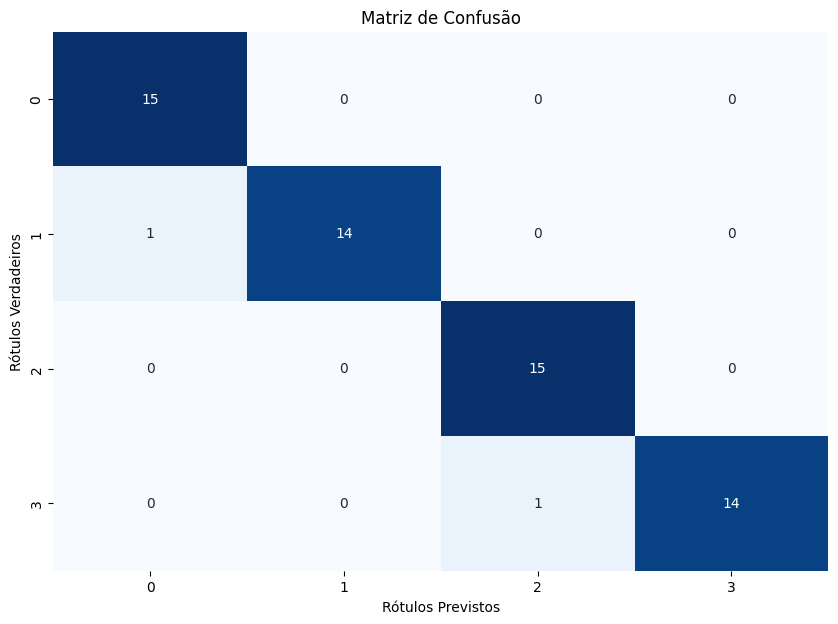

In [62]:
cm = confusion_matrix(valid_labels_np, classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão")
plt.show()

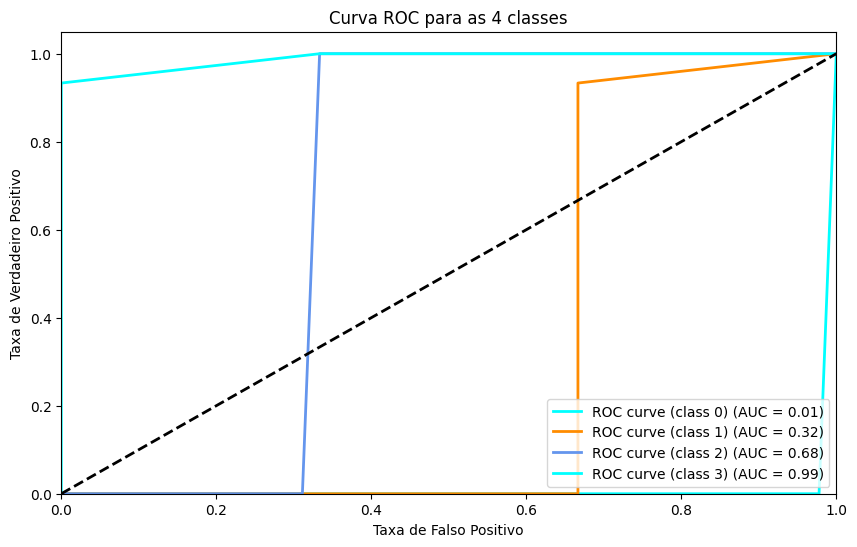

In [63]:
valid_labels_np_bin = label_binarize(valid_labels_np, classes=range(4))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(valid_labels_np_bin[:, i], classes[:])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para as 4 classes')
plt.legend(loc="lower right")
plt.show()

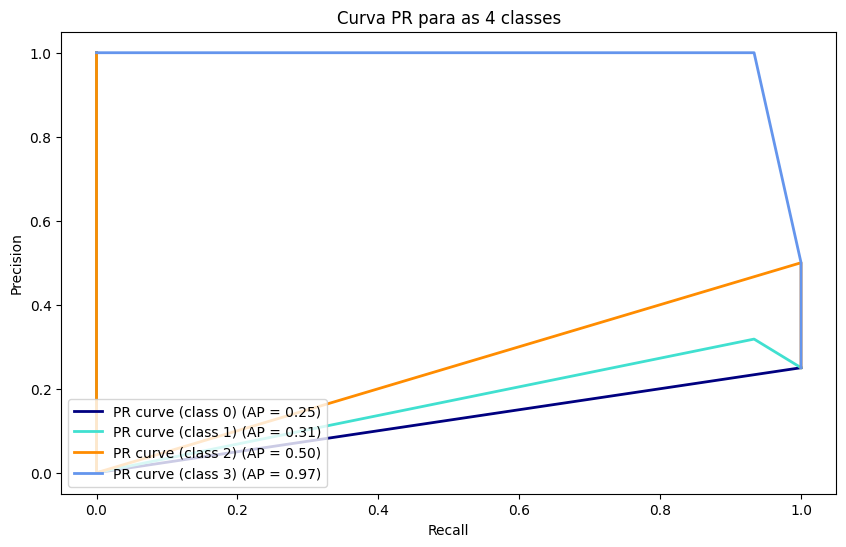

In [64]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(valid_labels_np_bin[:, i], classes[:])
    average_precision[i] = average_precision_score(valid_labels_np_bin[:, i], classes[:])

plt.figure(figsize=(10, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'PR curve (class {i}) (AP = {average_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva PR para as 4 classes')
plt.legend(loc="lower left")
plt.show()